# Pymaceuticals Inc.
---

### Analysis

- In this assingment there were 249 mice to analyze over. Based on the pie chart that shows the distribution of female and male mice, we can see that there is almost the same amount of female and male mice's being analyzed. The total population is composed of 49% female mice and 51% male mice. In this test there are 9 drug regimens as well as a palcebo placed. Out of the 9 drugs regimens being tested, Capomulin followed by Ramicane both have shown the highest effectivness in reducing the growth of tumor. This is shown by both drugs in the drug summary statistics by having the lowest mean, median, variance, and standard deviation compared to the other drug regimens being tested. Based on the scatter plot created to visualize the tumor volume versus the timepoints of mouse m957, it displays a sudden drop in the volume size of the tumor around day 10 and continues to fall with slight increases till day 35. After day 35 we can see the tumor voulume has been remaining consistent at the lower volume towards the end of the experiment. In the Correlation and Regression section of this assignment we can see that there is a positive relationship between the tumor size and weight of the mice. In the final scatter plot, we can see as the weight of the mice increases, the volume of the tumor increases as well.  

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_data = pd.merge(mouse_metadata, study_results, how= "outer", on="Mouse ID")

# Display the data table for preview

merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
num_mice = len(merged_data ["Mouse ID"].unique())

num_mice


249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]) , "Mouse ID"].unique()

duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

dupli_data = merged_data.loc[merged_data["Mouse ID"] == "g989", :]

dupli_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)== False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.

mice_clean = clean_df["Mouse ID"].nunique()
mice_clean

# how many types of drugs+placebo
# drug = clean_df["Drug Regimen"].nunique()
# drug

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line

aggregated_summ = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem'])

aggregated_summ

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

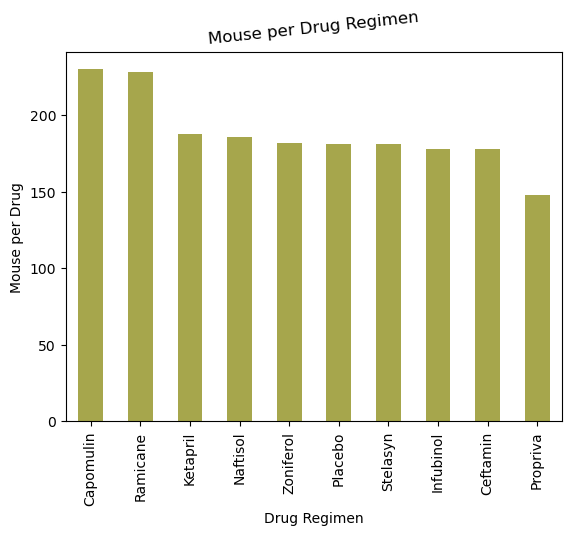

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_pandas = mice_count.plot.bar(color="olive", alpha = 0.7)


plt.title("Mouse per Drug Regimen", rotation = 6)
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse per Drug")

plt.show()

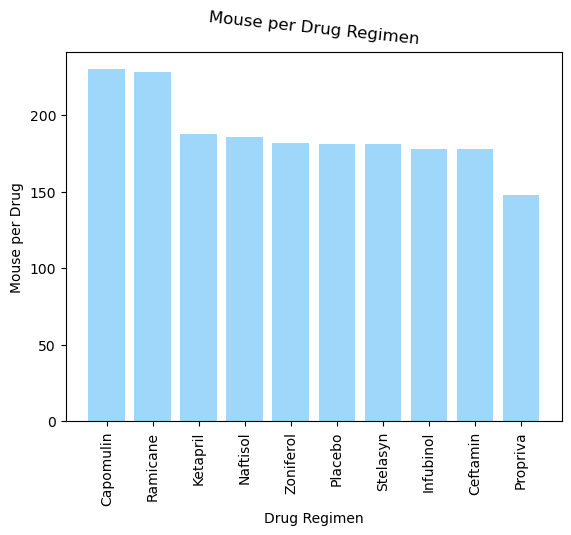

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_drugs = mice_count.index
y_mouse = mice_count.values

plt.title("Mouse per Drug Regimen", rotation = -6)
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse per Drug")
plt.xticks(rotation = "vertical")

plt.bar(x_drugs,y_mouse, color = "lightskyblue", alpha = 0.8)

plt.show()

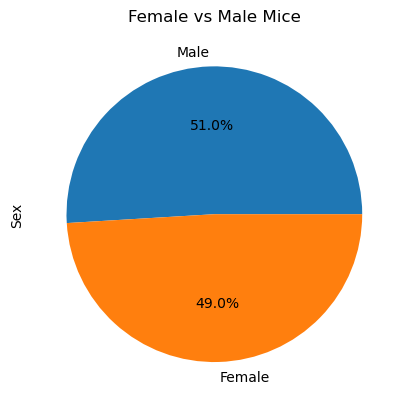

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_panda = clean_df["Sex"].value_counts()
gender_panda.plot.pie(autopct = "%1.1f%%")
plt.title("Female vs Male Mice")
plt.show()

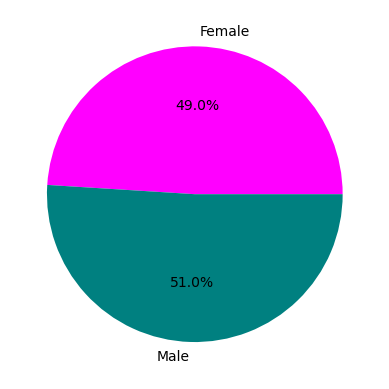

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.0, 51.0]
colors = ["magenta", "teal"]
gender_py = plt.pie(sizes, labels = labels, autopct="%1.1f%%", colors = colors)

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_tp = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge_gdf = pd.merge(greatest_tp, clean_df, on= (["Mouse ID" , "Timepoint"]))
merge_gdf

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
#Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

for treatment in treatments:
    regimen = merge_gdf.loc[merge_gdf["Drug Regimen"] == treatment]
    tumor_vol = regimen ["Tumor Volume (mm3)"]
    tumor_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartile0 = tumor_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3

# Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} can possibly be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} can possibly be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} can possibly be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} can possibly be outliers")

For Capomulin values below 20.70456164999999 and above 51.83201549 can possibly be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 can possibly be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 can possibly be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 can possibly be outliers


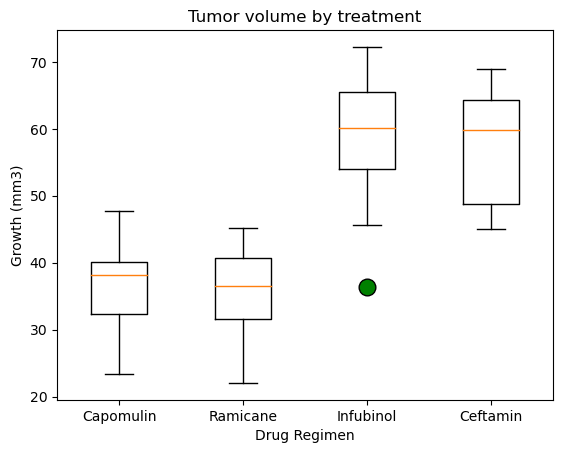

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

flierprops = dict(marker='o', markerfacecolor='g', markersize=12)
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_data, flierprops = flierprops, labels = treatments)
plt.show()

## Line and Scatter Plots

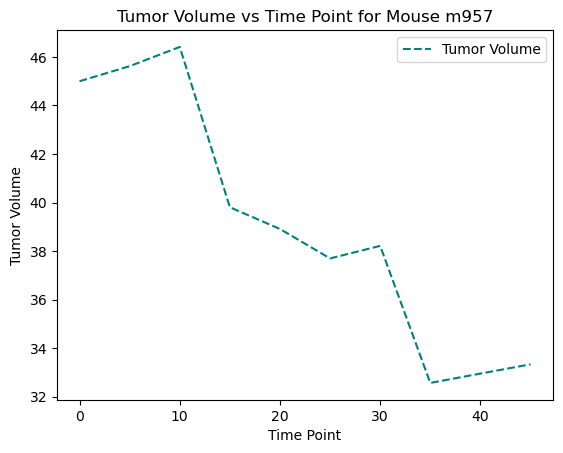

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mice.value_counts("Mouse ID")

single_mouse = clean_df.loc[clean_df["Mouse ID"] == "m957"]

x_time = single_mouse["Timepoint"]
tumorvol_y = single_mouse["Tumor Volume (mm3)"]


plt.plot(x_time, tumorvol_y, color="teal", label = "Tumor Volume", linestyle = "dashed")
plt.title("Tumor Volume vs Time Point for Mouse m957")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.legend(loc= "best")

plt.show()

/var/folders/_s/xr22rb0d74l36001gkdblyy80000gp/T/ipykernel_38968/3047136902.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg = capomulin_mice.groupby("Mouse ID").mean()


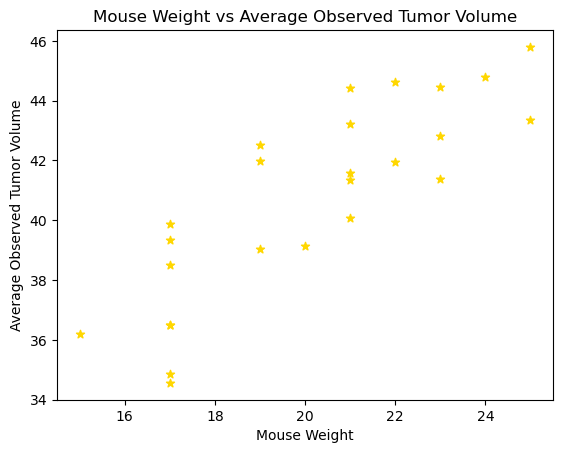

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = capomulin_mice.groupby("Mouse ID").mean()
capo_x = capomulin_avg["Weight (g)"]
capo_y = capomulin_avg["Tumor Volume (mm3)"]

plt.scatter(capo_x, capo_y, color="gold", marker="*")
plt.title("Mouse Weight vs Average Observed Tumor Volume")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Observed Tumor Volume')
plt.show()

## Correlation and Regression

/var/folders/_s/xr22rb0d74l36001gkdblyy80000gp/T/ipykernel_38968/2994684799.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_group =capomulin_mice.groupby(["Mouse ID"]).mean()


Text(0, 0.5, 'Tumor volume (mm3)')

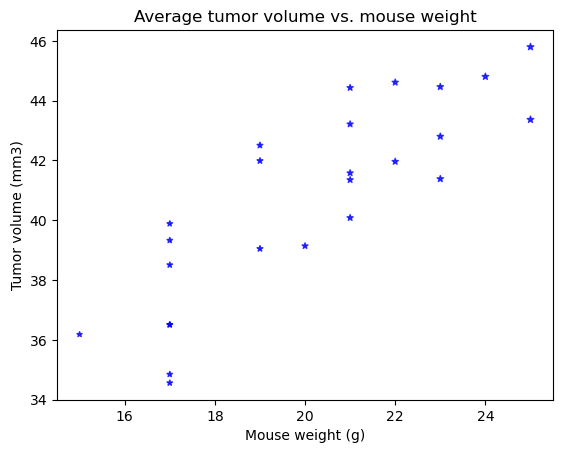

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

cap_group =capomulin_mice.groupby(["Mouse ID"]).mean()
cap_group.head()

#Get average tumor volumen
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]

plt.scatter(avg_tumor_vol, avg_weight, marker="*", color = "blue", s=avg_tumor_vol, alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")